# Preprocesamiento


In [17]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = "../data/train.csv"  # Asegúrate de colocar la ruta correcta en tu entorno
df = pd.read_csv(file_path)

# Mostrar información general
print("📌 Información del dataset:")
df.info()


📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

#### Inciso 4: División del dataset en entrenamiento y prueba

In [ ]:
# En este paso, eliminamos la columna 'Id', si existe, ya que no aporta información útil al modelo.
# Luego, definimos las variables predictoras (X) y la variable objetivo (y = SalePrice).
# Posteriormente, dividimos el dataset en un 80% para entrenamiento y un 20% para prueba,
# asegurando que la división sea reproducible con un random_state.


# 1. Verificar si 'Id' existe antes de eliminarlo
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# 2. Definir variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['SalePrice'])  # Todas las variables excepto el precio
y = df['SalePrice']  # Variable objetivo

# 3. División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Reproducibilidad con random_state
)

# 4. Mostrar información después de la división
print(f"🔹 Tamaño total del dataset: {df.shape}")
print(f"🔹 Conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"🔹 Conjunto de prueba: {X_test.shape[0]} filas")


🔹 Tamaño total del dataset: (1460, 80)
🔹 Conjunto de entrenamiento: 1168 filas
🔹 Conjunto de prueba: 292 filas


#### Inciso 5: Ingeniería de características

📌 Variables numéricas: 36
📌 Variables categóricas: 43
📊 Variables con mayor correlación con SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


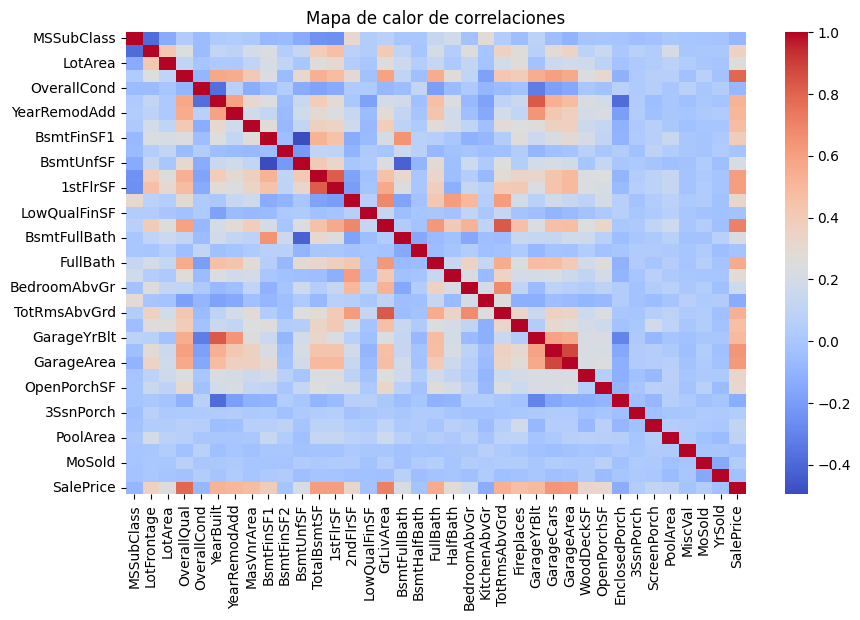

🔍 Variables con valores nulos:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64
✅ Valores nulos reemplazados correctamente.


In [ ]:
# Primero, identificamos las variables numéricas y categóricas del dataset.
# Luego, analizamos la correlación entre las variables numéricas y SalePrice para seleccionar las más relevantes.
# Revisamos las variables con valores nulos y aplicamos imputación:
# - Para variables numéricas: se llenan los valores faltantes con la mediana.
# - Para variables categóricas: se llenan los valores faltantes con "None".
# Esto ayuda a evitar problemas en el modelo y mejora su rendimiento.


# 1. Identificar variables numéricas y categóricas
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"📌 Variables numéricas: {len(numerical_features)}")
print(f"📌 Variables categóricas: {len(categorical_features)}")

# 2. Análisis de correlación con 'SalePrice' (solo numéricas)
corr_matrix = df[numerical_features + ['SalePrice']].corr()
high_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)[1:10]

# Mostrar variables más correlacionadas con el precio
print("📊 Variables con mayor correlación con SalePrice:")
print(high_corr_features)

# 3. Visualización de la correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Mapa de calor de correlaciones")
plt.show()

# 4. Análisis de valores nulos
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("🔍 Variables con valores nulos:")
print(missing_values)

# 5. Imputación de valores nulos (SOLUCIÓN A FUTUREWARNING)
for col in missing_values.index:
    if col in numerical_features:
        # Llenar con la mediana para valores numéricos
        df[col] = df[col].fillna(df[col].median())
    else:
        # Llenar con 'None' para valores categóricos
        df[col] = df[col].fillna("None")

print("✅ Valores nulos reemplazados correctamente.")


#### Inciso 6: Asegurar reproducibilidad

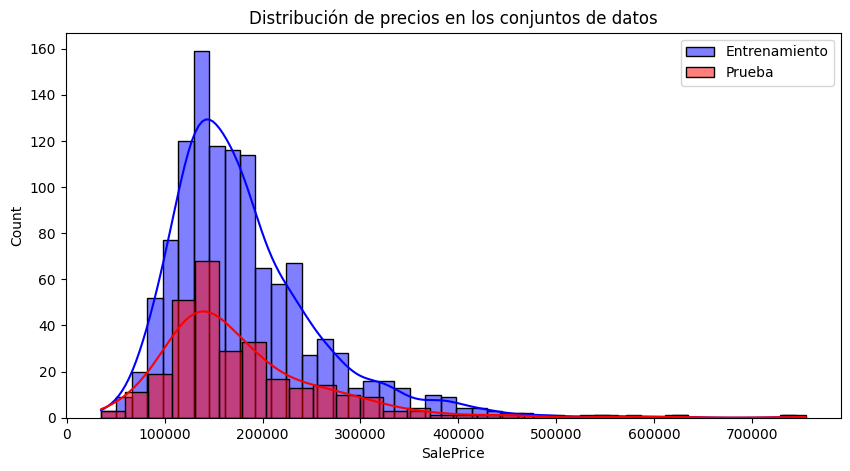

✅ División reproducible garantizada.


In [ ]:
# Para garantizar que la división del dataset sea siempre la misma, fijamos una semilla aleatoria (SEED = 42).
# Luego, verificamos que la distribución de SalePrice sea similar en los conjuntos de entrenamiento y prueba,
# utilizando gráficos de histogramas para visualizar la representatividad de los datos.
# Esto es crucial para evitar sesgos y garantizar la consistencia en los resultados del modelo.


# 1. Asegurar que los datos divididos sean siempre los mismos
SEED = 42  # Fijar la semilla para garantizar que las divisiones sean reproducibles

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

# 2. Verificar que la distribución de precios en ambos conjuntos sea similar
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, color='blue', label="Entrenamiento")
sns.histplot(y_test, kde=True, color='red', label="Prueba")
plt.legend()
plt.title("Distribución de precios en los conjuntos de datos")
plt.show()

print("✅ División reproducible garantizada.")
